In [2]:
using Plots
using Roots

In [3]:
# Forward Euler formula
# Left endpoint rule
function forward_euler(func, t, y1)
    N = size(t, 1)
    #y = zeros(N, 1)
    y = Array{typeof(y1),1}(undef,N)
    y[1] = y1
    for i=1:N-1
        y[i+1] = y[i] + (t[i+1] - t[i]) * func(t[i], y[i])
    end
    y
end

forward_euler (generic function with 1 method)

In [4]:
function modified_euler(func, t, y1)
    N = size(t, 1)
    y = Array{typeof(y1), 1}(undef, N)
    y[1] = y1
    for i=1:N-1
        xp = y[i] + (t[i+1] - t[i]) * func(t[i], y[i])
        y[i+1] = y[i] + (t[i+1] - t[i])/2 * (func(t[i], y[i]) + func((t[i]+(t[i+1] - t[i])), xp))
    end
    y
end

modified_euler (generic function with 1 method)

1001

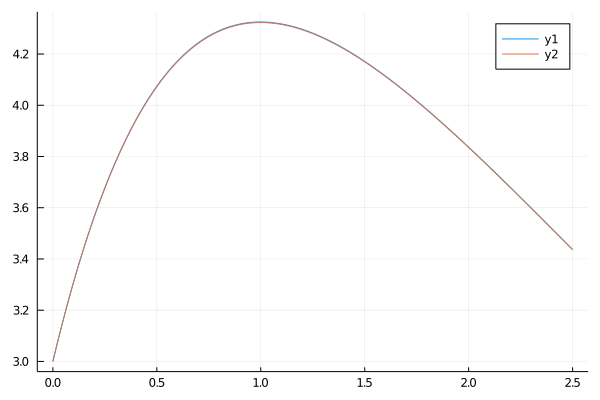

In [5]:
t = [n for n=0:((2.5-0)/1000):2.5]
print(size(t,1))
ode_func1(t, y) = -1.2y + 7*exp(-0.3t)
ys = forward_euler(ode_func1, t, 3.0)
yys = modified_euler(ode_func1, t, 3.0)
plot(t, ys)
plot!(t, yys)

In [6]:
# Backward Euler Method
# Right endpoint rule
using Roots
function backward_euler(func, t, y1)
    N = size(t, 1)
    #y = zeros(N, size(y1,1))
    y = Array{typeof(y1),1}(undef,N)
    y[1] = y1
    for i=1:N-1
        ode_eqn = (y_next) -> y_next .- y[i] .- (t[i+1] - t[i]) * func(t[i+1], y_next)
        y[i+1] = fzero(ode_eqn, y[i])
    end
    y
end

backward_euler (generic function with 1 method)

In [7]:
# Crank-Nicolson
# Midpoint rule
# Backward Euler Method
# Right endpoint rule
function crank_nicolson(func, t, y1)
    N = size(t, 1)
    y = Array{typeof(y1),1}(undef,N)
    y[1] = y1
    for i=1:N-1
        ode_eqn = (y_next) -> y_next - y[i] - (t[i+1] - t[i]) * func((t[i]+t[i+1])/2, (y[i]+y_next)/2)
        y[i+1] = fzero(ode_eqn, y[i])
        # y[i+1] =  y[i] + (t[i+1] - t[i]) * func((t[i+1]+t[i])/2, (y[i]+y[i+1])/2)
    end
    y
end

crank_nicolson (generic function with 1 method)

In [8]:
# Runge-Kutta 4
# Simpson Quadrature formula
function rk4(func, t, y1)
    N = size(t, 1)
    y = Array{typeof(y1),1}(undef,N)
    y[1] = y1
    for i=1:N-1
        dt = t[i+1] - t[i]
        K1 = func(t[i], y[i])
        K2 = func(t[i]+(dt/2), y[i] + (dt/2)*K1)
        K3 = func(t[i]+(dt/2), y[i] + (dt/2)*K2)
        K4 = func(t[i] + dt, y[i] + (dt * K3))
        y[i+1] = y[i] + dt * (K1/6 + K2/3 + K3/3 + K4/6)
    end
    y
end

rk4 (generic function with 1 method)

In [9]:
function rk2(func, t, y1)
    N = size(t, 1)
    y = Array{typeof(y1),1}(undef,N)
    y[1] = y1
    for i=1:N-1
        dt = t[i+1] - t[i]
        K1 = dt*func(t[i], y[i])
        K2 = dt*func(t[i]+dt, y[i] + K1)
        y[i+1] = y[i] + (1/2)*(K1 + K2)
    end
    y
end

rk2 (generic function with 1 method)

1001

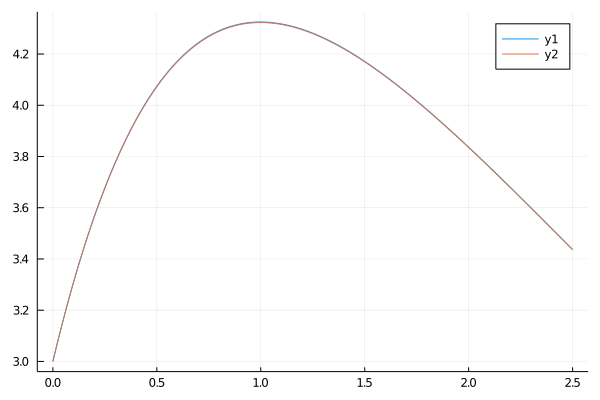

In [10]:
t = [n for n=0:((2.5-0)/1000):2.5]
print(size(t,1))
ode_func1(t, y) = -1.2y + 7*exp(-0.3t)
ys = forward_euler(ode_func1, t, 3.0)
yys = rk2(ode_func1, t, 3.0)
plot(t, ys)
plot!(t, yys)

In [19]:
sigma=10; beta=8/3; r=28;
function lorenz_eqs(t, xyz)
    x=xyz[1]; y=xyz[2]; z=xyz[3];
    dxyzdt=[sigma*(y-x); x*(r-z)-y; x*y-beta*z];
end
x0=1.0; y0=1.0; z0=1.0;
t_span = range(0, 100, length=10000)
lorenz_test = rk4(lorenz_eqs, t_span, [x0; y0; z0; ])
plot!([data[1] for data in lorenz_test], [data[2] for data in lorenz_test], [data[3] for data in lorenz_test], vars=(1,2,3))
png("lorenz_eqn.png")

![Lorenz Equation](./|lorenz_eqn.png)